In [25]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [26]:
from fastai import *
from fastcore import *
from pathlib2 import Path
import json
import pandas as pd
import coco_text
import skimage.io as io
import pylab
import numpy as np
import matplotlib.pyplot as plt
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [27]:
Path().absolute()

PosixPath('/home/fredrikmathisen/Documents/text_detection')

In [28]:
#path_coco = Path('/home/paperspace/data/coco')
path_coco = Path('/home/fredrikmathisen/Documents/Data/coco')

In [29]:
#Paperspace path
#img_dir = Path('/home/paperspace/data/coco/images/train2014/')
#annotations = Path('/home/paperspace/data/coco/annotations/COCO_Text.json')

#Local path mmiv
img_dir = path_coco/'images/train2014/'
annotations = path_coco/'annotations/COCO_Text.json'


In [30]:
annotations

PosixPath('/home/fredrikmathisen/Documents/Data/coco/annotations/COCO_Text.json')

In [7]:
ct_anno = coco_text.COCO_Text(annotations)

loading annotations into memory...
0:00:01.741871
creating index...
index created!


In [8]:
ct_anno.info()

url: http://vision.cornell.edu/se3/coco-text/
date_created: 2017-03-28
version: 1.4
description: This is 1.4 version of the 2017 COCO-Text dataset.
author: COCO-Text group


In [9]:
imgs = ct_anno.getImgIds(imgIds=ct_anno.train, catIds=[('legibility','legible'),('class','machine printed')])

In [10]:
anns = ct_anno.getAnnIds(imgIds=ct_anno.train, 
                        catIds=[('legibility','legible'),('class','machine printed')], 
                        areaRng=[0,200])

In [11]:
# get all images containing at least one instance of legible text
imgIds = ct_anno.getImgIds(imgIds=ct_anno.train, catIds=[('legibility','legible')])
# pick one at random
img = ct_anno.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

/home/fredrikmathisen/Documents/Data/coco/images/train2014/COCO_train2014_000000496646.jpg


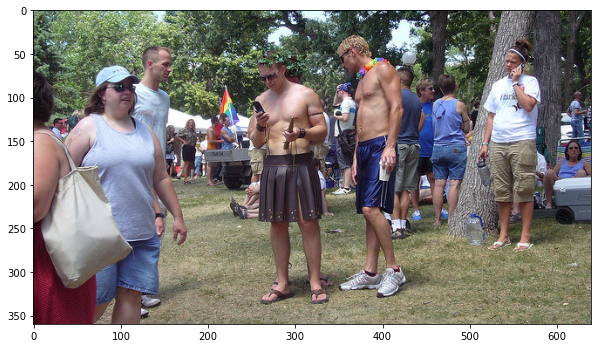

In [12]:
dataType = 'train2014'


I = io.imread('%s/images/%s/%s'%(path_coco,dataType,img['file_name']))
print('%s/images/%s/%s'%(path_coco,dataType,img['file_name']))
plt.figure()
plt.imshow(I)

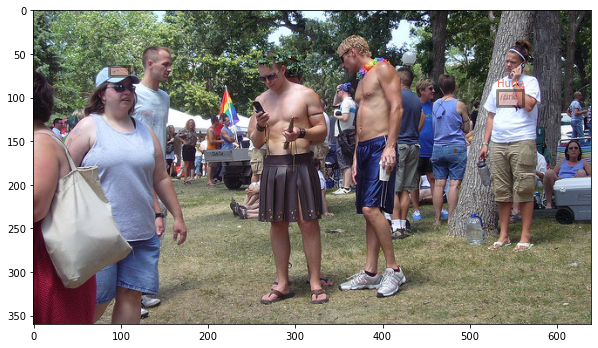

In [13]:
plt.imshow(I)
annIds = ct_anno.getAnnIds(imgIds=img['id'])
anns = ct_anno.loadAnns(annIds)
ct_anno.showAnns(anns)

In [14]:
img

{'width': 640,
 'file_name': 'COCO_train2014_000000496646.jpg',
 'set': 'train',
 'id': 496646,
 'height': 360}

In [15]:
anns

[{'polygon': [86.15408262122416,
   63.88001264151884,
   109.55630837639109,
   63.88001264151884,
   109.55630837639109,
   75.06645331948494,
   86.15408262122416,
   75.06645331948494],
  'language': 'na',
  'area': 261.7876101425452,
  'class': 'machine printed',
  'image_id': 496646,
  'bbox': [86.15408262122416,
   63.88001264151884,
   23.402225755166928,
   11.186440677966099],
  'legibility': 'illegible',
  'id': 1194099},
 {'polygon': [531.8138600457074,
   91.33763976016289,
   561.321014258744,
   91.33763976016289,
   561.321014258744,
   109.64272450592554,
   531.8138600457074,
   109.64272450592554],
  'language': 'english',
  'area': 540.130958475922,
  'id': 1194098,
  'utf8_string': 'Hurle',
  'image_id': 496646,
  'bbox': [531.8138600457074,
   91.33763976016289,
   29.507154213036557,
   18.305084745762663],
  'legibility': 'legible',
  'class': 'machine printed'}]

In [16]:
train_imgs = ct_anno.loadImgs(ct_anno.train)

In [16]:
len(train_imgs)

43686

In [17]:
train_imgs[0]

{'width': 612,
 'file_name': 'COCO_train2014_000000378466.jpg',
 'set': 'train',
 'id': 378466,
 'height': 612}

In [18]:
train_anno_ids = ct_anno.getAnnIds(ct_anno.train)

In [19]:
len(train_anno_ids)

118309

In [20]:
type(train_anno_ids[0])

int

In [21]:
train_annos = ct_anno.loadAnns(train_anno_ids)

In [22]:
len(train_annos)

118309

In [23]:
train_annos[0]['bbox']

[212.35294117647058,
 108.67088607594941,
 25.815126050420183,
 17.215189873417717]

In [31]:
from fastai.vision.all import *

In [32]:
img_names = get_image_files(img_dir)

In [111]:
def get_annotations_text(fname, prefix=None):
    "Open a COCO style json in `fname` and returns the lists of filenames (with maybe `prefix`) and labelled bboxes."
    annot_dict = json.load(open(fname))
    id2images, id2bboxes = {}, collections.defaultdict(list),
    #classes = {o['id']:o['name'] for o in annot_dict['cats']}
    for o in annot_dict['anns'].keys():
        anns = annot_dict['anns'][o]
        bb = anns['bbox']
        id2bboxes[anns['image_id']].append([bb[0],bb[1], bb[0]+bb[2], bb[1]+bb[3]])
        id2images = {anns['id']:ifnone(prefix, '') + imgs['file_name'] for img in annot_dict['imgs'].keys() if imgs['id'] in id2bboxes['id']}

    '''   
    #id2cats[o['image_id']].append(classes[o['category_id']])
    for o in annot_dict['imgs'].keys():
        imgs = annot_dict['imgs'][o]
        print(id2images)
        '''
    #id2images = {o['id']:ifnone(prefix, '') + o['file_name'] for o in annot_dict['imgs'] if o['id'] in id2bboxes}
    ids = list(id2images.keys())
    print(len(ids))
    return id2images, id2bboxes
    #return [id2images[k] for k in ids], [id2bboxes[k] for k in ids]

In [112]:
test_images, test_lbl_bbox = get_annotations_text(annotations)




{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{

KeyboardInterrupt: 

In [113]:
test_images

defaultdict(list,
            {10581: [[380.57979575247066,
               581.7662670169573,
               415.1992437528803,
               610.5664198710294],
              [392.7038412094116,
               55.81083655357361,
               413.9738931655884,
               62.92053246498108],
              [371.4147456028465,
               572.3458411748494,
               413.403003420591,
               606.4383385126506],
              [379.8077564467068,
               55.29220921901123,
               393.45161323527395,
               60.4868020062097],
              [343.9816292664045,
               55.02807738237401,
               379.36763203417235,
               60.83897778839264],
              [346.87852724257345, 17, 381.99741766934727, 27.42441684223501],
              [33.242266949152544,
               513.620253164557,
               57.54735169491526,
               558.9873417721519],
              [55.351165771484375,
               544.2091827392578,
    

In [114]:
len(test_lbl_bbox)

0

In [22]:
annot_dict = json.load(open(annotations))
denne = annot_dict['anns'].keys()


for o in denne:
    bb = annot_dict['anns'][o]
    #print(bb['image_id'])
    #print(bb['legibility'])
    #print(bb['bbox'])
    print(type(bb['legibility']))
    
    

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

KeyboardInterrupt: 

In [75]:
annotations.

AttributeError: 'PosixPath' object has no attribute 'keys'